In [87]:
!pip install -q -U kaggle_environments

In [80]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

**1. Агент камень**

> Agent rock - always chooses rock.

In [88]:
%%writefile rock_agent.py

#0 - rock
#1 - paper
#2 - scissors
def rock_agent(observation, configuration):
    return 0

Overwriting rock_agent.py


In [89]:
evaluate(
    "rps", #environment to use - no need to change
    ["rock_agent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-98.0, 98.0]]

**2. Агент бумага**

> Agent paper - always chooses paper.

In [90]:
%%writefile paper_agent.py

def paper_agent(observation, configuration):
    return 1

Overwriting paper_agent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["paper_agent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-97.0, 97.0]]

**3. Агент ножницы**

> Agent scissors - always chooses scissors.

In [91]:
%%writefile scissors_agent.py

def scissors_agent(observation, configuration):
    return 2

Overwriting scissors_agent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["scissors_agent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-99.0, 99.0]]

**4. Агент, копирующий последнее действие оппонента**

> Agent coppy opponent - copies the last action of the opponent.

In [92]:
%%writefile copy_opponent.py
import random

def copy_opponent(observation, configuration):
    
    if observation.step > 0:
        return observation.lastOpponentAction
    
    else:
        return random.randrange(0, configuration.signs)

Overwriting copy_opponent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["copy_opponent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-22.0, 22.0]]

**5. Случайный агент**

> Random agent - chooses randomly.

In [93]:
%%writefile random_agent.py
import random
def random_agent(observation, configuration):
    return random.randrange(random.randrange(0,2), 3)

Overwriting random_agent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["random_agent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-21.0, 21.0]]

**6. Последовательный агент (выкидывает последовательно камень, ножницы, бумага)**
> Sequential agent - always follows the pattern rock-paper-scissors.

In [94]:
%%writefile sequential_agent.py
seq=[0,1,2,2,1,0]

def sequential_agent(observation, configuration):
  result=seq.pop(0)
  seq.append(result)
  return result 

Overwriting sequential_agent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["sequential_agent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[49.0, -49.0]]

**7. Агент победитель (если в предыдущем раунде выиграл - повторяет свои действия, в противном случае выбирает случайно).**

> Agent winner - if won chooses the same move next time, if not chooses randomly

In [95]:
%%writefile winner_agent.py
import math

def get_score(left_move, right_move):
  delta = (
    right_move - left_move
    if (left_move + right_move) % 2 == 0
    else left_move - right_move
    )
  return 0 if delta == 0 else math.copysign(1, delta)

import random
last_move = None

def winner_agent(observation, configuration):
  global last_move
  
  if observation.step == 0:
    last_move = random.randrange(0, configuration.signs)
  elif get_score(last_move, observation.lastOpponentAction) != 1:
    last_move = random.randrange(0, configuration.signs)
  return last_move

Overwriting winner_agent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["winner_agent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[45.0, -45.0]]

**8. Агент проигравший (если в предыдущем раунде проиграл, повторяет свои действия).**

> Agent looser - makes the same move when lost, if not chooses randomly

In [96]:
%%writefile looser_agent.py
import math

def get_score(left_move, right_move):
  delta = (
    right_move - left_move
    if (left_move + right_move) % 2 == 0
    else left_move - right_move
    )
  return 0 if delta == 0 else math.copysign(1, delta)

import random
last_move = None

def looser_agent(observation, configuration):
  global last_move
  
  if observation.step == 0:
    last_move = random.randrange(0, configuration.signs)
  elif get_score(last_move, observation.lastOpponentAction) == -1:
    last_move = random.randrange(0, configuration.signs)
  return last_move

Overwriting looser_agent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["looser_agent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[22.0, -22.0]]

**9. Агент отстающий (выкидывает то, что победило бы предыдущий шаг соперника).** 

> Win previous move agent - chooses the move that whould have won in the previous round

In [97]:
%%writefile win_prev_move_agent.py

import random

def win_prev_move_agent(observation, configuration):
  if observation.step > 0:
    return (observation.lastOpponentAction+1)%configuration.signs
  else:
    return random.randrange(0, configuration.signs)

Overwriting win_prev_move_agent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["win_prev_move_agent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[57.0, -57.0]]

**10. Агент остающий лузер (выкидывает то, что проиграло бы предыдущему ходу оппонента).**

> Loose previous move agent - chooses the move that whould have lost in the previous round

In [98]:
%%writefile loose_prev_move_agent.py

import random

def loose_prev_move_agent(observation, configuration):
  if observation.step > 0:
    return (observation.lastOpponentAction+2)%configuration.signs
  else:
    return random.randrange(0, configuration.signs)

Overwriting loose_prev_move_agent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["loose_prev_move_agent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-96.0, 96.0]]

**11. Агент суммирующий. Берется остаток от деления на три всех предыдущих ходов.**

> Summing agent - sums all his previous moves and chooses accordingly. The first move is random.

In [99]:
%%writefile summing_agent.py

import random

last_move = 0


def summing_agent(observation, configuration):

  global last_move
  sum_result = []

  if observation.step > 0:
    sum_result.append(last_move)
    return (sum(sum_result))%configuration.signs
  else:
    return random.randrange(0, configuration.signs)

Overwriting summing_agent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["summing_agent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-93.0, 93.0]]

**12. Агент пи (берется остаток от деления на 3 каждой последующей цифры числа пи).**

> Agent pi - takes numbers of pi after the point and returns mod 3 of it as his move. 

In [100]:
%%writefile agent_pi.py
import math

lst_pi = list(map(int, str(math.pi)[2:]))

def agent_pi(observation, configuration):
  global lst_pi
  result=lst_pi.pop(0)
  
  lst_pi.append(result)
  return result%configuration.signs
  


Overwriting agent_pi.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["agent_pi.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[0, 0]]

**13. Агент Фибоначчи (берется остаток от деления на 3 каждого следующего числа Фибоначии.**

> Agent Fibonacci - takes Fibonacci numbers and returns mod 3 of it as his move.

In [101]:
%%writefile agent_fibonacci.py

fibo_list=[1,1]

def agent_fibonacci(observation, configuration):
    global fibo_list
    fibo_list.append(fibo_list[-1]+fibo_list[-2])
    return fibo_list.pop(0)%configuration.signs
  

Overwriting agent_fibonacci.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["agent_fibonacci.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[0, 0]]

**14. Агент, предпочитающий камень в 40% случаев.**

In [102]:
%%writefile tend_to_rock_agent.py
import random

def tend_to_rock_agent(observation, configuration):
  rand_num = random.randrange(random.randrange(1,2), 10)
  if rand_num in (0,2):
    result = 0
  else:
    result = rand_num % 3
  return result

Overwriting tend_to_rock_agent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["tend_to_rock_agent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-22.0, 22.0]]

**15. Агент, предпочитающий бумагу в 40% случаев.**

In [103]:
%%writefile tend_to_paper_agent.py
import random

def tend_to_paper_agent(observation, configuration):
  rand_num = random.randrange(random.randrange(0,2), 10)
  if rand_num in (0,2,3):
    result = 1
  else:
    result = rand_num % 3
  return result

Overwriting tend_to_paper_agent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["tend_to_paper_agent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-30.0, 30.0]]

**16. Агент, предпочитающий ножницы в 40% случаев.**

In [104]:
%%writefile tend_to_scissors_agent.py
import random

def tend_to_scissors_agent(observation, configuration):
  rand_num = random.randrange(random.randrange(0,2), 10)
  if rand_num in (0,1,3):
    result = 2
  else:
    result = rand_num % 3
  return result

Overwriting tend_to_scissors_agent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["tend_to_scissors_agent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-24.0, 24.0]]

**17. Агент, копирующий предпоследний ход оппонента**

In [105]:
%%writefile copy_penultimate_opponent_move_agent.py

penultimate_move = None
import random

def copy_penultimate_opponent_move_agent(observation, configuration):
  global penultimate_move
  
  if observation.step <3:
    return random.randrange(0, configuration.signs)
  if observation.step >= 3:
    return penultimate_move
  penultimate_move=observation.lastOpponentAction


Overwriting copy_penultimate_opponent_move_agent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["copy_penultimate_opponent_move_agent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-97.0, 97.0]]

**18. Агент, копирующий выигрышный ход оппонента.**


In [106]:
%%writefile copy_winner_opponent_agent.py
import random
import math 

def get_score(left_move, right_move):
  delta = (
    right_move - left_move
    if (left_move + right_move) % 2 == 0
    else left_move - right_move
    )
  return 0 if delta == 0 else math.copysign(1, delta)

last_move = None

def copy_winner_opponent_agent(observation, configuration):
  global last_move
  if observation.step == 0:
    last_move = random.randrange(0, configuration.signs)

  if observation.step > 0 and get_score(last_move, observation.lastOpponentAction) == -1:
    return observation.lastOpponentAction
    
  else:
    return random.randrange(0, configuration.signs)



Overwriting copy_winner_opponent_agent.py


In [84]:
evaluate(
    "rps", #environment to use - no need to change
    ["copy_winner_opponent_agent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[0, 0]]

In [129]:
members = [
        "rock",
        "paper",
        "scissors",
        "copy_opponent",
        "random_agent.py",
        'sequential_agent.py',
        'winner_agent.py',
        'looser_agent.py',
        'win_prev_move_agent.py',
        'loose_prev_move_agent.py',
        'summing_agent.py',
        'agent_pi.py',
        'agent_fibonacci.py',
        'tend_to_rock_agent.py',
        'tend_to_paper_agent.py',
        'tend_to_scissors_agent.py',
        'copy_penultimate_opponent_move_agent.py',
        'copy_winner_opponent_agent.py'
    ]

scores = np.zeros((len(members), len(members)), dtype=int)

In [133]:
for agent_1 in range(len(members)):
    for agent_2 in range(agent_1 + 1, len(members)):
      current_score = evaluate(
        "rps", #environment to use - no need to change
        [members[agent_1],  members[agent_2]], #agents to evaluate
        configuration={"episodeSteps": 100} #number of episodes 
        )
      scores[agent_1, agent_2] = current_score[0][0]
      scores[agent_2, agent_1] = current_score[0][1]


In [143]:
df_scores = pd.DataFrame(
    scores, 
    index=members, 
    columns=members,
)

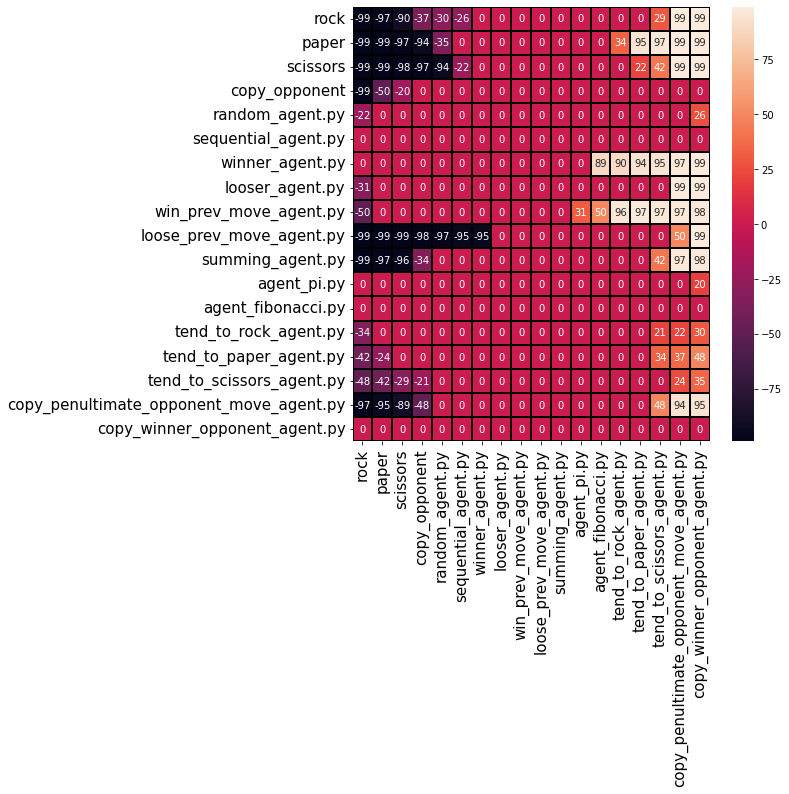

In [144]:
plt.figure(figsize=(8, 8))
sns.heatmap(
    df_scores, annot=True,  linewidths=1, linecolor='black',
)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15);